In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import io
from google.colab import files

In [ ]:
#uploading the data
uploaded=files.upload()

In [ ]:
data=pd.read_excel(io.BytesIO(uploaded["data.xlsx"]))
data.head()

,Id,project_name,Risk_level,APR,annual_revenue,facebook_url,fb_followers,fb_likers,fb_phone,company name,Inscription au registre du commerce,Forme juridique,Siège social de l'entreprise,Registre du commerce,Numéro au registre du commerce,IDE/TVA,status,Âge de l'entreprise,Chiffre d'affaires en CHF,Capital en CHF,Employés,Marques actives,Dernière modification,Responsabilité,Kapital in EUR,Kapital in GBP,Twitter_url,twitter_user,twt_score,tweets_num,twitter_likes,twitter_replies,twitter_retweets,Instagram_url,Instagram_user,Ig_Posts,Ig_Followers,Ig_Following,Ig_Account Type,Lnkd_followers,Lnkd_employees,Lnkd_industryCode,Lnkd_domain,Lnkd_industry,Lnkd_specialties,Lnkd_headquarters,Lnkd_type,Lnkd_founded
0,0,Jd'H Directe,Risk level C-,3.35%,"$32,567 USD",https://www.facebook.com/JDHDirecte,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/jdhdirectedit/,jdhdirectedit,400.0,1290,1033.0,Artist,93.0,2.0,80.0,jdhdirecte.fr,Marketing & Advertising,"Prise de rendez-vous qualifiÃ©s, Marketing b t...","Lille, Hauts-de-France",Privately Held,2019.0
1,1,Ker Computing,Risk level C-,NaN,"$33,192 USD",https://www.facebook.com/bang.ker.94,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.0,14.0,95.0,ker.ie,Maritime,"Electrical, Refrigeration / Air Conditioning, ...","Killybegs, Donegal",Privately Held,1995.0
2,2,Centre Du Patrimoine,Risk level B,NaN,NaN,https://www.facebook.com/centrepatrimoine,1306.0,1335,+33 5 34 41 86 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/centrepatrim?lang=ar,centrepatrim,109.0,2095.0,498.0,35.0,451.0,https://www.instagram.com/le_centre_du_patrimo...,le_centre_du_patrimoine,70.0,82,32.0,None,723.0,14.0,43.0,centrepatrimoine.fr,Financial Services,"Gestion de Patrimoine, Conseil Financier, and ...",NaN,Privately Held,2002.0
3,3,JB Technologie,Risk level C-,NaN,"$76,922 USD",https://www.facebook.com/JBTechnologies,1232.0,1237,56 people checked in here,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/jbtechnologies,jbtechnologies,18.0,48.0,1.0,0.0,1.0,https://www.instagram.com/jbtechnology_/,jbtechnology_,431.0,2284,28.0,Mobile Phone Shop,30.0,6.0,147.0,NaN,Industrial Automation,NaN,NaN,NaN,NaN
4,4,Scierie De L'Atlantique #2,Risk level A,6.78%,NaN,https://www.facebook.com/sefpm/?__xts__%5B2%5D...,1311.0,1255,+687 44.31.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/scieriedelatlantique/,scieriedelatlantique,19.0,73,23.0,None,5.0,2.0,61.0,NaN,Paper & Forest Products,NaN,NaN,NaN,NaN


In [ ]:
#data describtion
data.describe(include='all')

,Id,project_name,Risk_level,APR,annual_revenue,facebook_url,fb_followers,fb_likers,fb_phone,company name,Inscription au registre du commerce,Forme juridique,Siège social de l'entreprise,Registre du commerce,Numéro au registre du commerce,IDE/TVA,status,Âge de l'entreprise,Chiffre d'affaires en CHF,Capital en CHF,Employés,Marques actives,Dernière modification,Responsabilité,Kapital in EUR,Kapital in GBP,Twitter_url,twitter_user,twt_score,tweets_num,twitter_likes,twitter_replies,twitter_retweets,Instagram_url,Instagram_user,Ig_Posts,Ig_Followers,Ig_Following,Ig_Account Type,Lnkd_followers,Lnkd_employees,Lnkd_industryCode,Lnkd_domain,Lnkd_industry,Lnkd_specialties,Lnkd_headquarters,Lnkd_type,Lnkd_founded
count,1013.000000,1013,1013,980,469,716,739.0,739.0,456,137,129,129,137,127,129,129,137,137,137,104,137,137.000000,135,29,3,1,435,426,388.000000,388.000000,3.880000e+02,3.880000e+02,3.880000e+02,771,476,422.000000,422.0,422.000000,422,9.540000e+02,953.000000,914.000000,863,912,582,603,809,6.830000e+02
unique,NaN,1000,6,481,397,688,465.0,444.0,323,133,125,6,96,22,125,125,1,46,1,12,1,NaN,125,1,2,1,390,380,NaN,NaN,NaN,NaN,NaN,697,459,NaN,375.0,NaN,104,NaN,NaN,NaN,785,126,525,473,8,NaN
top,NaN,Uitgeverij Langeveld & De Rooy,Risk level B,3.26%,"$33,192 USD",https://www.facebook.com/ReworldMedia,0.0,0.0,1 person checked in here,Brandini,10.11.2015,Société anonyme,Zürich,ZH,CH-501.4.021.356-6,CHE-395.976.906,actif,1 Année,PremiumPremium,20'000,PremiumPremium,NaN,07.06.2021,Propriétaire,"60,0 Mio.",10'000,https://twitter.com/leasehold_solns,leasehold_solns,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/abdoualittlebit/,trignat_residences,NaN,482.0,NaN,None,NaN,NaN,NaN,nova-lease.com,Financial Services,"Financement, Location Evolutive, Equipements M...","Paris, ÃŽle-de-France",Privately Held,NaN
freq,NaN,2,495,9,8,5,181.0,181.0,23,2,2,49,10,23,2,2,137,14,137,43,137,NaN,3,29,2,1,14,14,NaN,NaN,NaN,NaN,NaN,19,3,NaN,4.0,NaN,208,NaN,NaN,NaN,6,53,6,32,499,NaN
mean,506.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102190,NaN,NaN,NaN,NaN,NaN,NaN,502.244845,2494.440722,1.037156e+05,8.726745e+03,4.242889e+04,NaN,NaN,431.609005,NaN,685.469194,NaN,1.040394e+04,679.550892,65.253829,NaN,NaN,NaN,NaN,NaN,3.125950e+04
std,292.572213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.407371,NaN,NaN,NaN,NaN,NaN,NaN,1539.527604,7912.342242,7.986671e+05,8.268716e+04,3.765393e+05,NaN,NaN,913.388997,NaN,1124.779171,NaN,9.939212e+04,6688.414760,42.096498,NaN,NaN,NaN,NaN,NaN,7.648395e+05
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,-113.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000,NaN,0.000000,NaN,2.000000e+00,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.818000e+03
25%,253.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,73.750000,2.075000e+01,2.000000e+00,8.000000e+00,NaN,NaN,41.000000,NaN,78.250000,NaN,5.300000e+01,6.000000,32.000000,NaN,NaN,NaN,NaN,NaN,1.988500e+03
50%,506.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,492.000000,5.575000e+02,3.200000e+01,2.045000e+02,NaN,NaN,159.000000,NaN,274.500000,NaN,2.520000e+02,14.000000,53.000000,NaN,NaN,NaN,NaN,NaN,2.003000e+03
75%,759.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,288.250000,1556.000000,3.063500e+03,2.240000e+02,1.417000e+03,NaN,NaN,440.750000,NaN,871.750000,NaN,1.143000e+03,46.000000,96.000000,NaN,NaN,NaN,NaN,NaN,2.011000e+03


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Id                                   1013 non-null   int64  
 1   project_name                         1013 non-null   object 
 2   Risk_level                           1013 non-null   object 
 3   APR                                  980 non-null    object 
 4   annual_revenue                       469 non-null    object 
 5   facebook_url                         988 non-null    object 
 6   fb_followers                         1013 non-null   object 
 7   fb_likers                            1013 non-null   int64  
 8   fb_phone                             456 non-null    object 
 9   company name                         137 non-null    object 
 10  Inscription au registre du commerce  129 non-null    object 
 11  Forme juridique               

In [ ]:

del data["facebook_url"]
del data["fb_phone"]
del data["company name"]
del data["Inscription au registre du commerce"]
del data["Registre du commerce"]
del data['IDE/TVA']
del data["Chiffre d'affaires en CHF"]
del data['Employés']
del data['Dernière modification']
del data['Responsabilité']
del data['Kapital in EUR']
del data['Kapital in GBP']
del data['Twitter_url']
del data['twitter_user']
del data['Instagram_url']
del data['Instagram_user']


In [ ]:
#APR % remove 
L=[]
for i in data['APR']:
    x=str(i).split('%')[0]
    L.append(float(x))

data['APR']=L    
data['APR']

0        3.35
1         NaN
2         NaN
3         NaN
4        6.78
        ...  
1008    12.99
1009    11.71
1010     2.58
1011     8.96
1012     3.11
Name: APR, Length: 1013, dtype: float64

In [ ]:
#risk level 
L=[]
for i in data['Risk_level']:
    x=str(i).split()[-1]
    L.append(x)

data['Risk_level']=L    
data['Risk_level']

0       C-
1       C-
2        B
3       C-
4        A
        ..
1008     C
1009     C
1010    B+
1011     B
1012     C
Name: Risk_level, Length: 1013, dtype: object

In [ ]:

L=[]
for i in data['annual_revenue']:
    try :
        x=i.split()
        z=x[0][1:]
        a=z.replace(',','')
        if 'million' in i:
            L.append(float(a)*1000000)
        else:
            L.append(float(a))   
    except:
       L.append(None)    
    
 
data['annual_revenue']=L    
data['annual_revenue']


0       32567.0
1       33192.0
2           NaN
3       76922.0
4           NaN
         ...   
1008        NaN
1009        NaN
1010        NaN
1011        NaN
1012        NaN
Name: annual_revenue, Length: 1013, dtype: float64

In [ ]:

L=[]
for i in data['fb_followers']:
        L.append(float(i))
        
     
    

data['fb_followers']=L    
data['fb_followers']

0          0.0
1          0.0
2       1306.0
3       1232.0
4       1311.0
         ...  
1008    7124.0
1009     426.0
1010       0.0
1011       0.0
1012    3976.0
Name: fb_followers, Length: 1013, dtype: float64

In [ ]:
L=[]
for i in data['fb_likers']:
    try :
        L.append(float(i))
    except:
       L.append(i)    
    
 
data['fb_likers']=L    
data['fb_likers']

0          0.0
1          0.0
2       1335.0
3       1237.0
4       1255.0
         ...  
1008    7076.0
1009     424.0
1010       0.0
1011       0.0
1012    3957.0
Name: fb_likers, Length: 1013, dtype: float64

In [ ]:

L=[]
for i in data['Ig_Followers']:
    try:
        if 'k' in i:
            a=i[:len(i)-1]
            L.append(float(a)*1000)
        elif 'm' in i:
            a=i[:len(i)-1]
            L.append(float(a)*1000000)    
        else:
            L.append(i)   
    except:
      L.append(i)   
 
data['Ig_Followers']=L    
data['Ig_Followers']

0          1290.0
1             NaN
2            82.0
3          2284.0
4            73.0
          ...    
1008        141.0
1009       7316.0
1010       1151.0
1011    2000000.0
1012         89.0
Name: Ig_Followers, Length: 1013, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1013 non-null   int64  
 1   project_name                    1013 non-null   object 
 2   Risk_level                      1013 non-null   object 
 3   APR                             980 non-null    float64
 4   annual_revenue                  469 non-null    float64
 5   fb_followers                    1012 non-null   float64
 6   fb_likers                       1013 non-null   float64
 7   Forme juridique                 129 non-null    object 
 8   Siège social de l'entreprise    137 non-null    object 
 9   Numéro au registre du commerce  129 non-null    object 
 10  status                          137 non-null    object 
 11  Âge de l'entreprise             137 non-null    object 
 12  Capital en CHF                  10

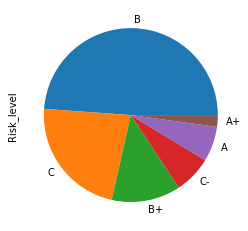

In [ ]:
#Risk level statistics
data['Risk_level'].value_counts().plot.pie()
plt.show()                   

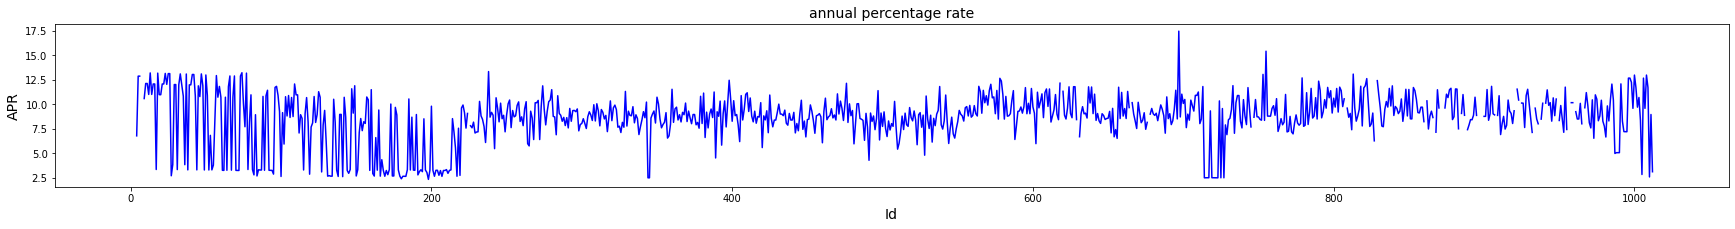

In [ ]:
plt.figure(figsize=(30, 3))
plt.plot(data['Id'],data['APR'], color='blue')
plt.title('annual percentage rate', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.ylabel('APR', fontsize=14)
plt.show()

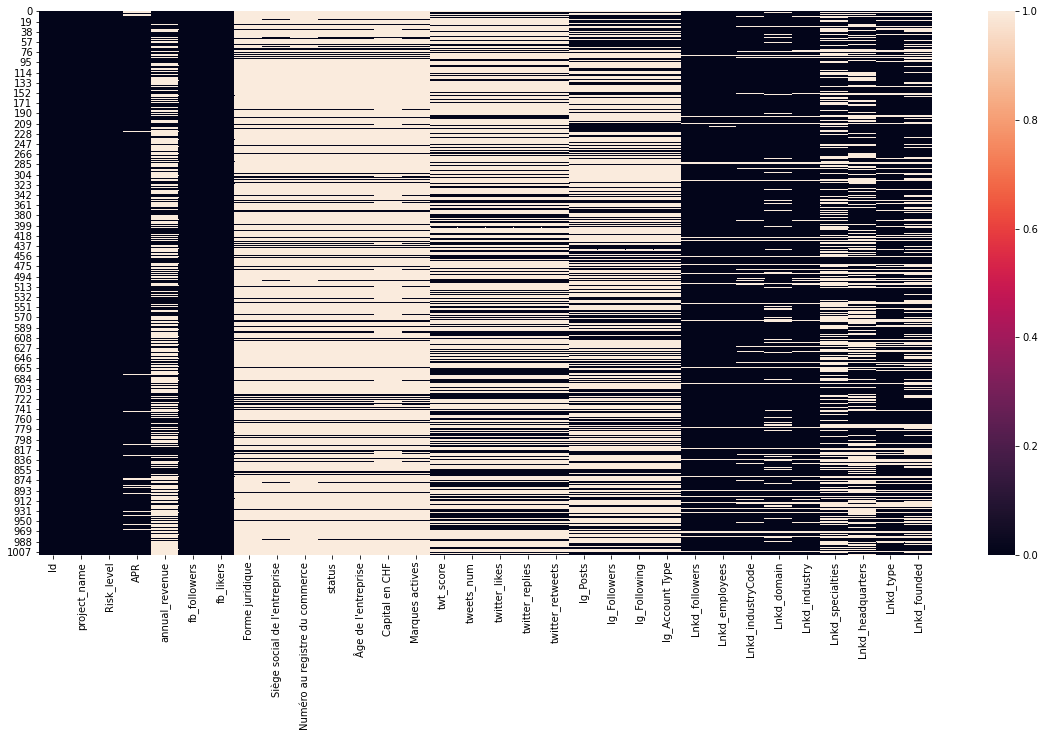

In [ ]:
#missing values statistics per variable (black:no missing values , white: a lot of missing values)
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull())

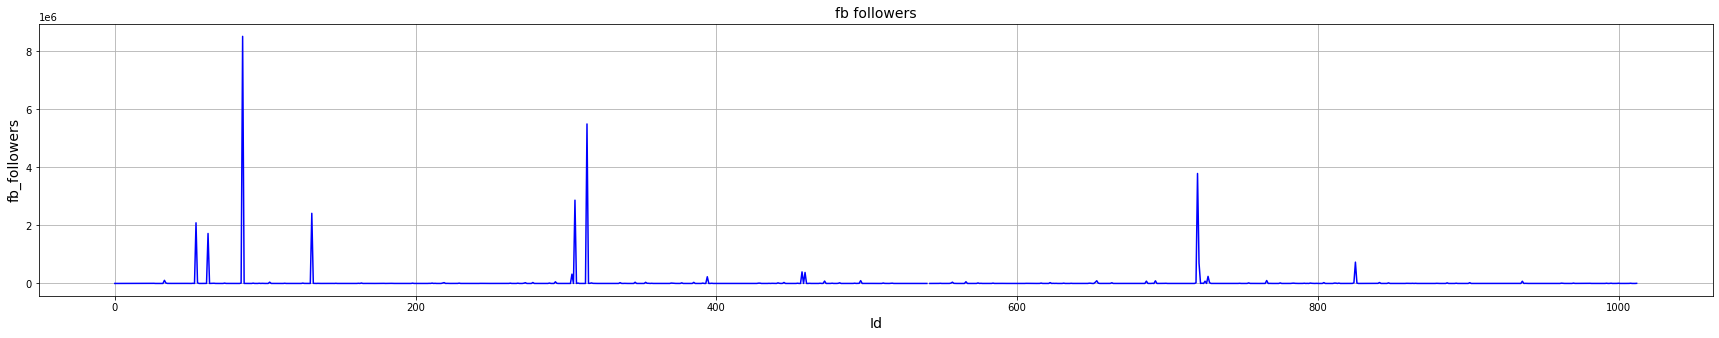

In [ ]:
plt.figure(figsize=(30, 5))
plt.plot(data['Id'],data['fb_followers'], color='blue')
plt.title('fb followers', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.ylabel('fb_followers', fontsize=14)
plt.grid(True)
plt.show()



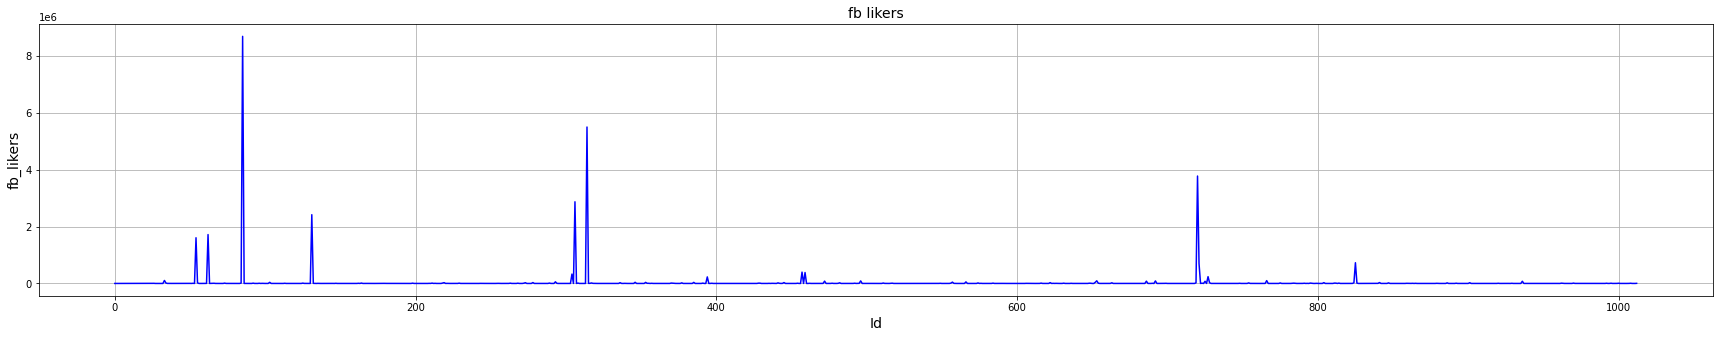

In [ ]:
plt.figure(figsize=(30, 5))
plt.plot(data['Id'],data['fb_likers'], color='blue')
plt.title('fb likers', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.ylabel('fb_likers', fontsize=14)
plt.grid(True)
plt.show()

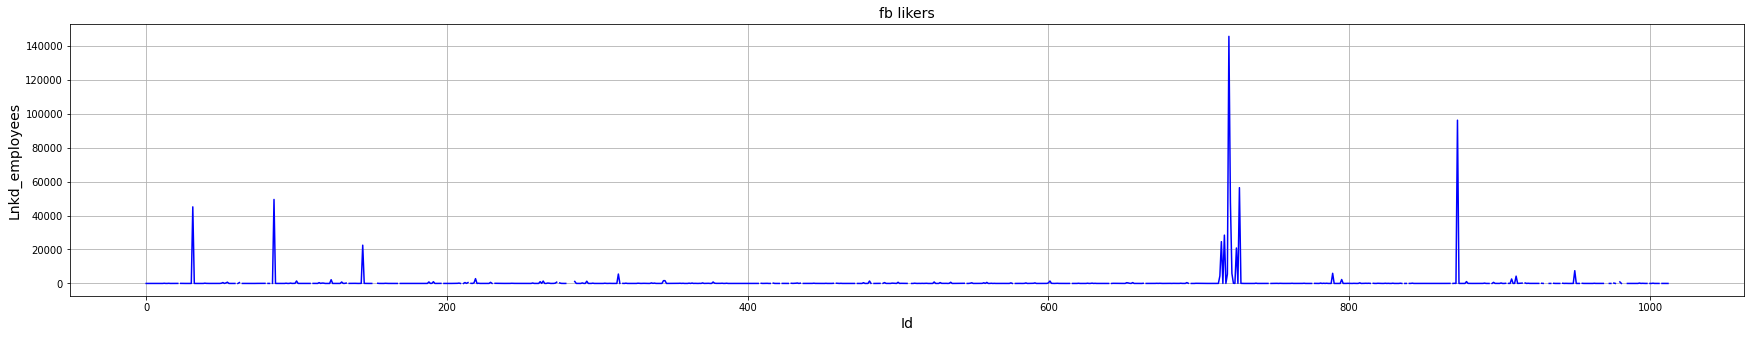

In [ ]:
plt.figure(figsize=(30, 5))
plt.plot(data['Id'],data['Lnkd_employees'], color='blue')
plt.title('Lnkd_employees', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.ylabel('Lnkd_employees', fontsize=14)
plt.grid(True)
plt.show()

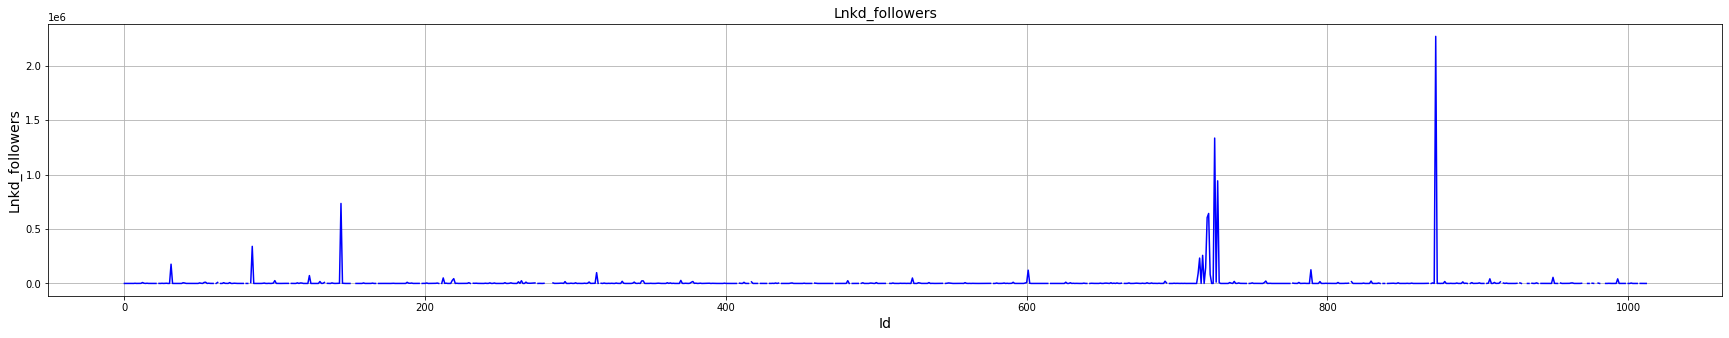

In [ ]:
plt.figure(figsize=(30, 5))
plt.plot(data['Id'],data['Lnkd_followers'], color='blue')
plt.title('Lnkd_followers', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.ylabel('Lnkd_followers', fontsize=14)
plt.grid(True)
plt.show()

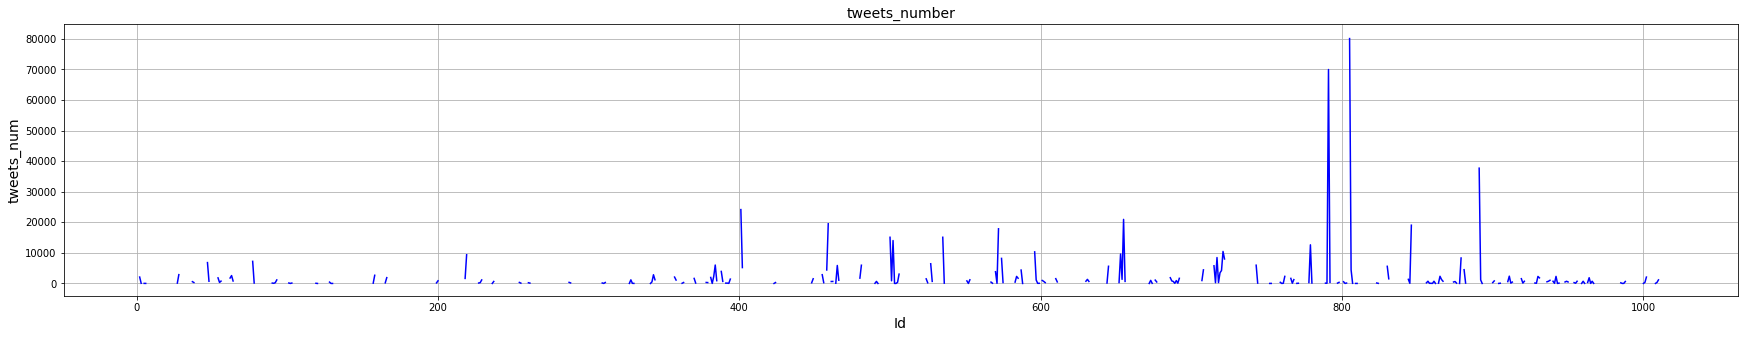

In [ ]:
plt.figure(figsize=(30, 5))
plt.plot(data['Id'],data['tweets_num'], color='blue')
plt.title('tweets_number', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.ylabel('tweets_num', fontsize=14)
plt.grid(True)
plt.show()

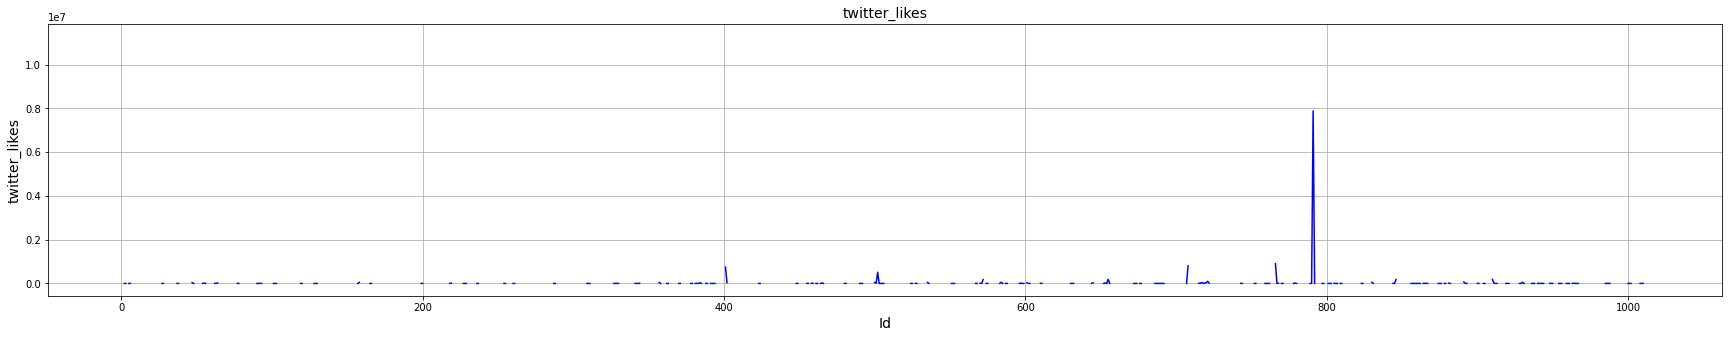

In [ ]:
plt.figure(figsize=(30, 5))
plt.plot(data['Id'],data['twitter_likes'], color='blue')
plt.title('twitter_likes', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.ylabel('twitter_likes', fontsize=14)
plt.grid(True)
plt.show()

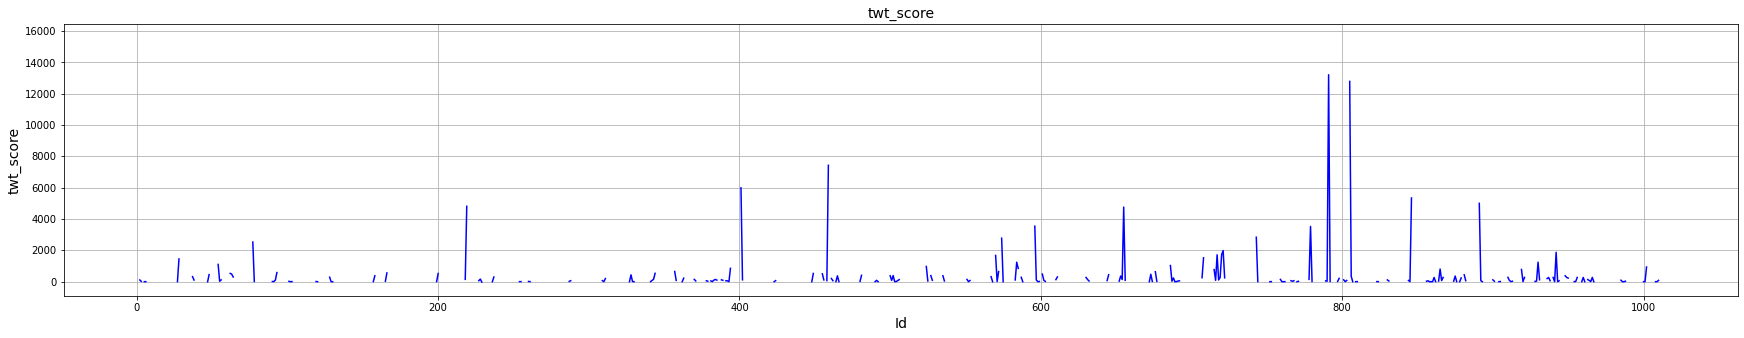

In [ ]:
plt.figure(figsize=(30, 5))
plt.plot(data['Id'],data['twt_score'], color='blue')
plt.title('twt_score', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.ylabel('twt_score', fontsize=14)
plt.grid(True)
plt.show()

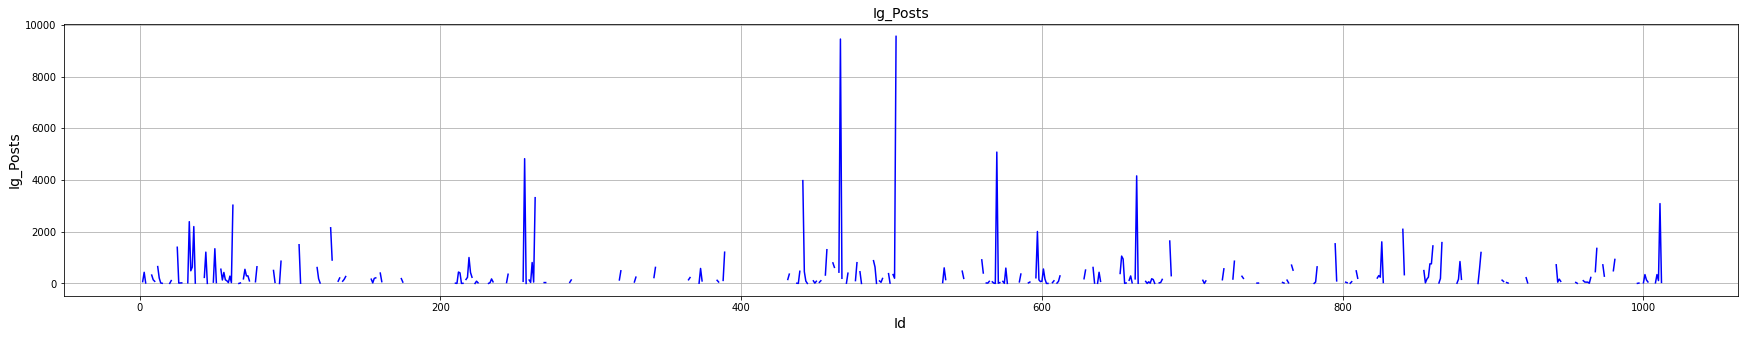

In [ ]:
plt.figure(figsize=(30, 5))
plt.plot(data['Id'],data['Ig_Posts'], color='blue')
plt.title('Ig_Posts', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.ylabel('Ig_Posts', fontsize=14)
plt.grid(True)
plt.show()

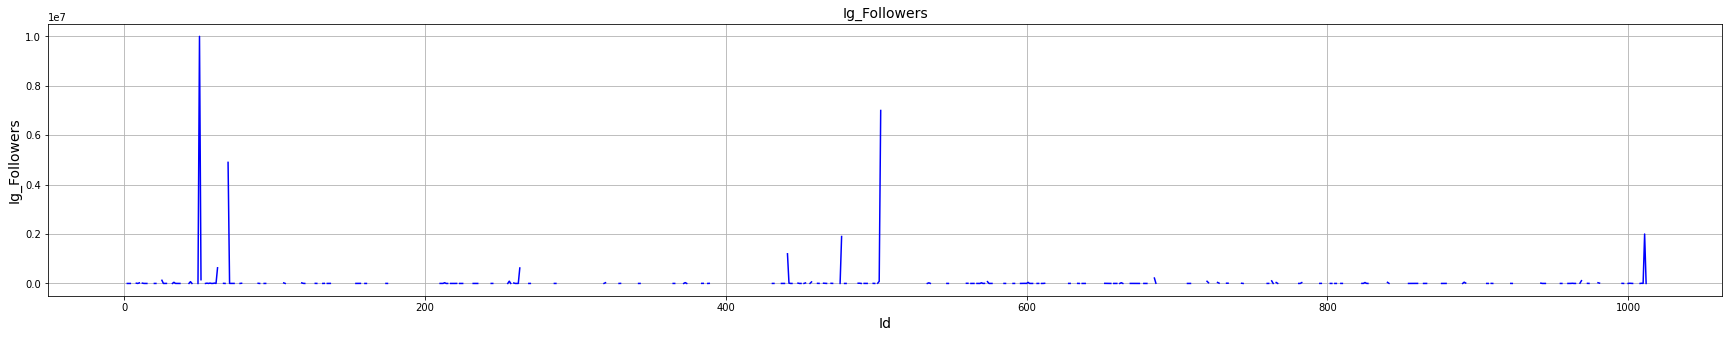

In [ ]:
plt.figure(figsize=(30, 5))
plt.plot(data['Id'],data['Ig_Followers'], color='blue')
plt.title('Ig_Followers', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.ylabel('Ig_Followers', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#selection du nombre de valeurs differents pour chaque variable
data.select_dtypes(include=['object']).nunique()

project_name                      1000
Risk_level                           6
Forme juridique                      6
Siège social de l'entreprise        96
Numéro au registre du commerce     125
status                               1
Âge de l'entreprise                 46
Capital en CHF                      12
Ig_Account Type                    104
Lnkd_domain                        785
Lnkd_industry                      126
Lnkd_specialties                   525
Lnkd_headquarters                  473
Lnkd_type                            8
dtype: int64

In [ ]:
del data['project_name']
del data["Siège social de l'entreprise"]
del data['Numéro au registre du commerce']
del data['status']
del data['Ig_Account Type']
del data['Lnkd_domain']
del data['Lnkd_headquarters']
del data["Lnkd_specialties"]
del data["Lnkd_industry"]



In [ ]:
#selection du nombre de valeurs differents pour chaque variable
data.select_dtypes(include=['object']).nunique()

Risk_level           6
Forme juridique      6
Capital en CHF      12
Lnkd_industry      126
Lnkd_type            8
dtype: int64

In [ ]:
L=[]
for i in data['Capital en CHF']:
    try :
        a=i.replace("'",'')
        L.append(float(a))
    except:
       L.append(None)    
    
 
data['Capital en CHF']=L    
data['Capital en CHF'].head(20)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13    20000.0
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
Name: Capital en CHF, dtype: float64

In [ ]:
L=[]
for i in data['Risk_level']:
    if i =='A+':
      L.append(0)
    elif i=='A':
      L.append(1) 
    elif i=='A-':
      L.append(2)    
    elif i=='B+':
      L.append(3) 
    elif i=='B':
      L.append(4) 
    elif i=='B-':
      L.append(5)   
    elif i=='C+':
      L.append(6)    
    elif i=='C':
      L.append(7)  
    elif i=='C-':
      L.append(8)
    elif i=='D+':
      L.append(9)    
    elif i=='D':
      L.append(10)  
    elif i=='D-':
      L.append(11)
    elif i=='E+':
      L.append(12)    
    elif i=='E':
      L.append(13)  
    elif i=='E-':
      L.append(14)
    elif i=='F+':
      L.append(15)    
    elif i=='F':
      L.append(16)  
    elif i=='F-':
      L.append(17)  
    else:
      L.append(i)  

 
data['Risk_level']=L    
data['Risk_level']



0       8
1       8
2       4
3       8
4       1
       ..
1008    7
1009    7
1010    3
1011    4
1012    7
Name: Risk_level, Length: 1013, dtype: int64

In [ ]:
#selection du nombre de valeurs differents pour chaque variable
data.select_dtypes(include=['object']).nunique()

Forme juridique    6
Lnkd_type          8
dtype: int64

In [ ]:
from google.colab import files
data.to_csv('clean1.csv') 
files.download('clean1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#categorical variable selection
obj_cols=data.select_dtypes(include=['object']).columns.tolist()
obj_cols

['Forme juridique', 'Lnkd_type']

In [ ]:
dt_num = data.drop(obj_cols,axis='columns')

In [ ]:
#conversion des var categoriels en num
dic = {}
for col in obj_cols: 
    dic[col] = pd.get_dummies(data[col]).iloc[:,1:]
dic['Forme juridique'].head(3)

,Filiale étrangère,Fondation,Raison individuelle,Société anonyme,Société à responsabilité limitée
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0


In [ ]:
dic['Lnkd_type'].head(3)

,Government Agency,Nonprofit,Partnership,Privately Held,Public Company,Self-Employed,Sole Proprietorship
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0


In [ ]:
#concaténation des nouvelles variables convertis avec les variables qui sont deja num
data_set=pd.concat([dt_num,dic['Forme juridique'],
 dic['Lnkd_type']], axis=1)

In [ ]:
data_set.head()

,Id,Risk_level,APR,annual_revenue,fb_followers,fb_likers,Capital en CHF,Marques actives,twt_score,tweets_num,twitter_likes,twitter_replies,twitter_retweets,Ig_Posts,Ig_Followers,Ig_Following,Lnkd_followers,Lnkd_employees,Lnkd_industryCode,Lnkd_founded,Filiale étrangère,Fondation,Raison individuelle,Société anonyme,Société à responsabilité limitée,Government Agency,Nonprofit,Partnership,Privately Held,Public Company,Self-Employed,Sole Proprietorship
0,0,8,3.35,32567.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,1290.0,1033.0,93.0,2.0,80.0,2019.0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,8,NaN,33192.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.0,14.0,95.0,1995.0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,4,NaN,NaN,1306.0,1335.0,NaN,NaN,109.0,2095.0,498.0,35.0,451.0,70.0,82.0,32.0,723.0,14.0,43.0,2002.0,0,0,0,0,0,0,0,0,1,0,0,0
3,3,8,NaN,76922.0,1232.0,1237.0,NaN,NaN,18.0,48.0,1.0,0.0,1.0,431.0,2284.0,28.0,30.0,6.0,147.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0
4,4,1,6.78,NaN,1311.0,1255.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,73.0,23.0,5.0,2.0,61.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                1013 non-null   int64  
 1   Risk_level                        1013 non-null   int64  
 2   APR                               980 non-null    float64
 3   annual_revenue                    469 non-null    float64
 4   fb_followers                      1012 non-null   float64
 5   fb_likers                         1013 non-null   float64
 6   Capital en CHF                    88 non-null     float64
 7   Marques actives                   137 non-null    float64
 8   twt_score                         388 non-null    float64
 9   tweets_num                        388 non-null    float64
 10  twitter_likes                     388 non-null    float64
 11  twitter_replies                   388 non-null    float64
 12  twitte

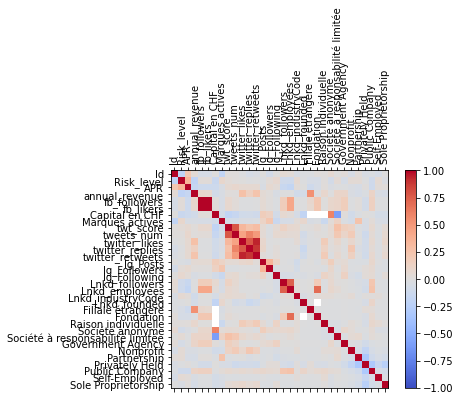

In [ ]:
corr = data_set.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_set.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_set.columns)
ax.set_yticklabels(data_set.columns)
plt.show()

In [ ]:
corr

,Id,Risk_level,APR,annual_revenue,fb_followers,fb_likers,Capital en CHF,Marques actives,twt_score,tweets_num,twitter_likes,twitter_replies,twitter_retweets,Ig_Posts,Ig_Followers,Ig_Following,Lnkd_followers,Lnkd_employees,Lnkd_industryCode,Lnkd_founded,Filiale étrangère,Fondation,Raison individuelle,Société anonyme,Société à responsabilité limitée,Government Agency,Nonprofit,Partnership,Privately Held,Public Company,Self-Employed,Sole Proprietorship
Id,1.000000,-0.202504,0.222476,0.040613,-0.060468,-0.058972,0.000962,-0.188024,0.010949,0.008525,-0.015435,-0.059323,-0.037456,0.006174,-0.072552,0.000266,0.047847,0.034130,-0.039815,-0.020023,-0.019593,0.021674,0.008057,0.055841,0.005631,0.024736,-0.048148,0.026097,-0.041776,-0.028689,-0.058083,-0.000601
Risk_level,-0.202504,1.000000,0.349558,-0.196564,0.028452,0.026837,-0.135399,0.087056,0.037639,0.010960,0.005548,-0.015096,-0.002241,-0.029485,0.037130,0.073024,-0.101058,-0.107051,0.057334,-0.010800,-0.049237,-0.057251,0.012296,-0.076351,0.041333,-0.059211,0.041915,0.042112,-0.011363,-0.100454,0.048207,-0.035123
APR,0.222476,0.349558,1.000000,-0.157944,-0.112628,-0.110218,-0.113527,-0.040298,0.060171,0.081677,0.059463,0.062069,0.061693,-0.039084,0.066886,0.037043,-0.142634,-0.172323,0.030212,0.004989,-0.106674,-0.055731,0.016966,-0.037830,-0.007980,-0.011666,-0.032388,-0.050423,0.008833,-0.106063,0.027580,0.017712
annual_revenue,0.040613,-0.196564,-0.157944,1.000000,0.084492,0.072577,-0.085562,-0.042446,0.016208,0.010202,0.272238,0.143547,0.247597,0.046760,0.022921,-0.042001,-0.002582,-0.002832,-0.091242,-0.069622,0.532060,-0.018785,0.084898,-0.001245,0.107775,0.104937,-0.034640,-0.057874,-0.026101,0.114868,-0.042172,-0.058812
fb_followers,-0.060468,0.028452,-0.112628,0.084492,1.000000,0.999066,0.022874,-0.048182,0.072761,0.023462,-0.008933,-0.009124,-0.007339,0.052678,0.011026,-0.022296,0.172750,0.424755,0.007608,-0.000086,0.083312,0.223560,0.000892,0.087962,0.101951,0.169905,-0.014352,0.016755,-0.075311,0.145216,-0.012499,-0.011687
fb_likers,-0.058972,0.026837,-0.110218,0.072577,0.999066,1.000000,0.021144,-0.047268,0.072977,0.024686,-0.008619,-0.008937,-0.007061,0.054260,0.012052,-0.022109,0.173197,0.425537,0.007468,-0.000058,0.062616,0.221910,0.000785,0.087723,0.104058,0.169394,-0.014098,0.016936,-0.074234,0.141885,-0.012285,-0.011459
Capital en CHF,0.000962,-0.135399,-0.113527,-0.085562,0.022874,0.021144,1.000000,-0.075537,-0.194526,-0.155623,-0.089148,-0.082437,-0.099963,0.176182,0.133918,-0.071685,0.064774,0.026599,-0.054960,-0.183300,NaN,NaN,NaN,0.593892,-0.593892,0.018674,-0.079482,-0.025232,0.002448,-0.008571,-0.066617,-0.070154
Marques actives,-0.188024,0.087056,-0.040298,-0.042446,-0.048182,-0.047268,-0.075537,1.000000,-0.066668,-0.062723,-0.035422,-0.035220,-0.029957,0.118992,0.226768,-0.137211,-0.056901,-0.049543,0.031499,0.082695,-0.043663,-0.030645,-0.130465,0.037246,0.134944,-0.030645,-0.062699,0.257280,-0.041010,0.031257,-0.043663,-0.053883
twt_score,0.010949,0.037639,0.060171,0.016208,0.072761,0.072977,-0.194526,-0.066668,1.000000,0.786042,0.332174,0.252664,0.294447,0.050777,-0.021420,0.047771,0.126173,0.075321,0.062620,0.007286,0.014829,0.040624,-0.006271,0.060149,0.267074,0.160140,0.126907,-0.017867,-0.053796,0.066827,-0.019883,0.040246
tweets_num,0.008525,0.010960,0.081677,0.010202,0.023462,0.024686,-0.155623,-0.062723,0.786042,1.000000,0.449628,0.600650,0.494197,0.046044,-0.021009,0.062533,0.056850,0.041319,0.048379,-0.072825,-0.008940,0.011184,0.006078,0.047104,0.212477,0.106466,0.191425,-0.003839,-0.103218,0.043588,-0.023579,0.066185


In [ ]:
fig, ax = plt.subplots(figsize=(30,15)) 
sns.heatmap(data_set.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')

In [ ]:
del data_set["fb_likers"]
del data_set["twitter_replies"]
del data_set["twitter_retweets"]
del data_set["Unnamed: 0"]
del data_set["Id"]
